# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
lat_lngs_list = list(lat_lngs)
#len(cities)
print(len(cities))

596


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")
        

Processing record 1|new norfolk
Processing record 2|isiro
Processing record 3|torbay
Processing record 4|susanville
Processing record 5|walvis bay
Processing record 6|arkhara
City not found. skipping.
Processing record 7|blackwater
Processing record 8|coquimbo
Processing record 9|hobart
Processing record 10|tasiilaq
Processing record 11|busselton
Processing record 12|geraldton
Processing record 13|anloga
Processing record 14|aklavik
Processing record 15|east london
Processing record 16|khatanga
Processing record 17|xinzhou
Processing record 18|zhigansk
Processing record 19|kaitangata
Processing record 20|thanh hoa
City not found. skipping.
Processing record 21|rikitea
Processing record 22|vaini
City not found. skipping.
City not found. skipping.
Processing record 23|kapaa
Processing record 24|punta arenas
Processing record 25|saskylakh
Processing record 26|ushuaia
City not found. skipping.
Processing record 27|kavieng
Processing record 28|gamba
Processing record 29|mataura
Processing r

Processing record 235|verkhnevilyuysk
Processing record 236|camacha
Processing record 237|corinto
Processing record 238|oranjemund
City not found. skipping.
Processing record 239|murgab
Processing record 240|cidreira
Processing record 241|mangrol
Processing record 242|dergachi
Processing record 243|paradise
Processing record 244|panama city
Processing record 245|codrington
Processing record 246|maturin
Processing record 247|kruisfontein
Processing record 248|acapulco
Processing record 249|lixourion
Processing record 250|jombang
Processing record 251|nabire
Processing record 252|anito
Processing record 253|saint-augustin
Processing record 254|yeniseysk
Processing record 255|cherskiy
Processing record 256|erdenet
Processing record 257|kahului
Processing record 258|eyl
Processing record 259|caravelas
Processing record 260|yaan
Processing record 261|west lake stevens
Processing record 262|odesskoye
Processing record 263|beringovskiy
Processing record 264|enshi
City not found. skipping.
Cit

Processing record 475|cap malheureux
Processing record 476|saint anthony
Processing record 477|lieksa
Processing record 478|ambagarh chauki
Processing record 479|chapais
Processing record 480|general pico
Processing record 481|fukuma
Processing record 482|merced
Processing record 483|yar-sale
City not found. skipping.
Processing record 484|pacifica
Processing record 485|vardo
Processing record 486|bemidji
Processing record 487|biak
Processing record 488|liwale
Processing record 489|ingenbohl
Processing record 490|rocha
Processing record 491|teguldet
City not found. skipping.
Processing record 492|bensonville
Processing record 493|yashalta
Processing record 494|plavsk
Processing record 495|taoudenni
Processing record 496|salinas
Processing record 497|nara
Processing record 498|wajir
Processing record 499|tura
City not found. skipping.
City not found. skipping.
Processing record 500|hervey bay
Processing record 501|chake chake
Processing record 502|moche
Processing record 503|buchanan
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_files/city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,New Norfolk,55,AU,1569425354,66,-42.78,147.06,50.00,11.41
1,Isiro,100,CD,1569425356,78,2.77,27.62,78.93,3.24
2,Torbay,90,CA,1569425355,100,47.66,-52.73,50.00,17.22
3,Susanville,1,US,1569425356,76,40.42,-120.65,57.99,3.36
4,Walvis Bay,0,NA,1569425356,68,-22.95,14.51,66.20,6.93


In [55]:
city_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

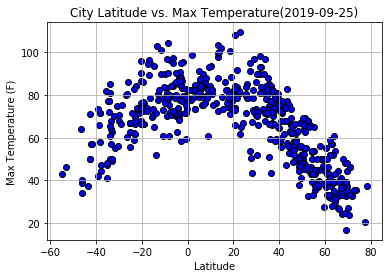

In [61]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_temp_plot")
plt.show()

#### Latitude vs. Humidity Plot

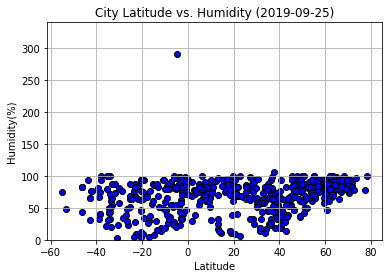

In [62]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_humidity_plot")
plt.show()

#### Latitude vs. Cloudiness Plot

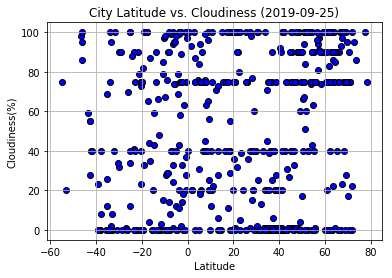

In [63]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_cloudiness_plot")
plt.show()

#### Latitude vs. Wind Speed Plot

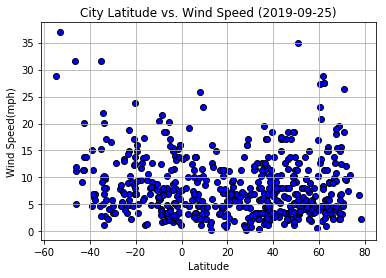

In [64]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("../output_files/Lat_vs_windSpeed_plot")
plt.show()

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.834982009960086


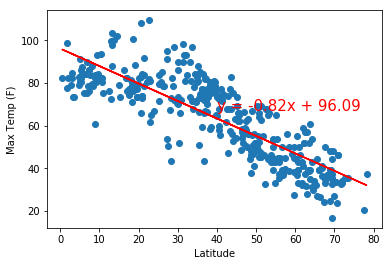

None


In [31]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6111970308032694


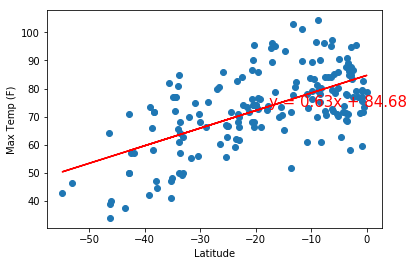

None


In [32]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24955429750089428


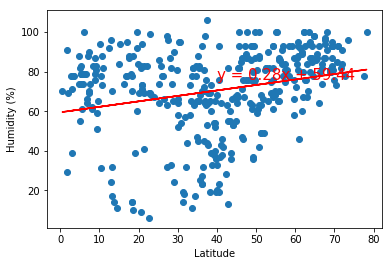

None


In [33]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12129151639419448


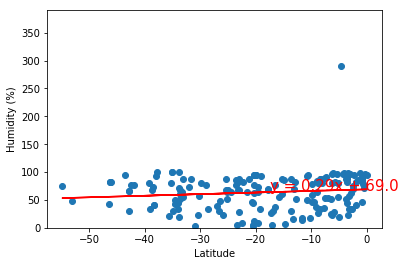

None


In [34]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1403638711268004


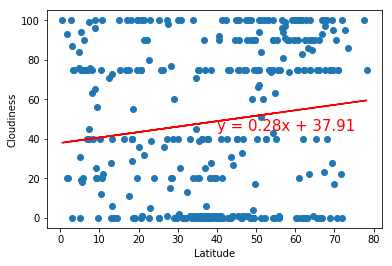

None


In [35]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18623183838632917


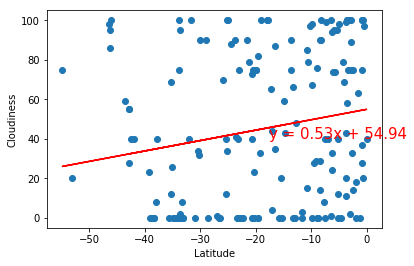

None


In [36]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.110173746114512


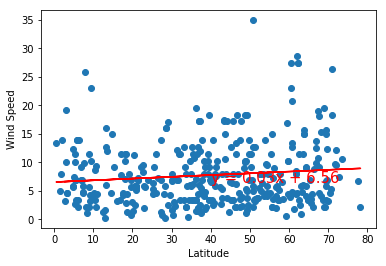

None


In [37]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.288424376245485


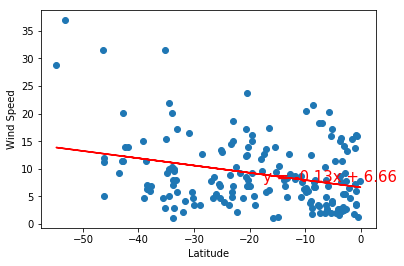

None


In [38]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))